In [1]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
# 1. Load dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)


In [3]:
# Extract texts and labels
texts = dataset['Review'].values
labels = dataset['Liked'].values

In [4]:

# 2. Text preprocessing (simple cleaning)
def clean_text(text):
    text = re.sub(r"[^a-zA-Z]", " ", text)  # remove non-letters
    text = text.lower()
    text = text.split()
    return " ".join(text)

texts = [clean_text(t) for t in texts]


In [5]:

# 3. Tokenization & Padding
vocab_size = 5000   # limit vocabulary size
maxlen = 100        # max sequence length
embedding_dim = 100

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=maxlen)

y = np.array(labels)


In [6]:

# 4. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:

# 5. Build LSTM Model
model = Sequential()
model.add(Input(shape=(maxlen,)))
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
#  early Stoppings

earlyStopping = EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)

In [9]:
# 6. Train
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[earlyStopping],
                    verbose=1)
# 7. Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.5250 - loss: 0.6917 - val_accuracy: 0.5600 - val_loss: 0.6879
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.7600 - loss: 0.6357 - val_accuracy: 0.7050 - val_loss: 0.6237
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.8363 - loss: 0.4361 - val_accuracy: 0.7150 - val_loss: 0.5684
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.9262 - loss: 0.2512 - val_accuracy: 0.6850 - val_loss: 0.6679
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.9212 - loss: 0.2248 - val_accuracy: 0.7400 - val_loss: 0.5250
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9762 - loss: 0.1158 - val_accuracy: 0.7500 - val_loss: 0.5455
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9850 - loss: 0.0800 - val_accuracy: 0.7800 - val_loss: 0.5714
Test Accuracy: 0.7400


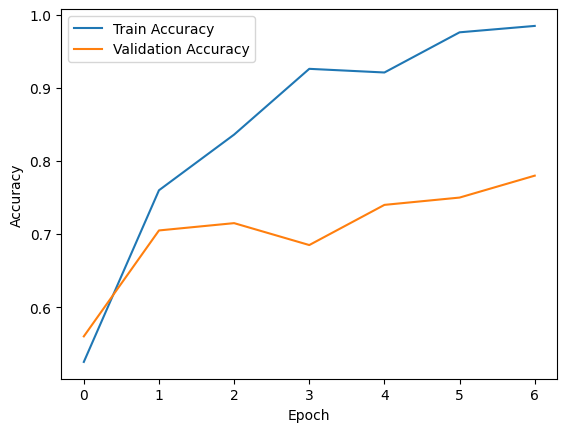

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [16]:
#  predict 
def predict_review(review_text):
    review_text = clean_text(review_text)   
    seq = tokenizer.texts_to_sequences([review_text])
    padded = pad_sequences(seq, maxlen=maxlen)
    
    pred = model.predict(padded)[0][0]
    
    sentiment = "Positive" if pred >= 0.5 else "Negative"
    return sentiment, float(pred)

print(predict_review("The food was absolutely wonderful, will come again!"))
print(predict_review("The service was terrible and the food was cold."))
print(predict_review("Overall I was not impressed and would not go back"))
print(predict_review("the taste was terible"))
print(predict_review("One of the best food"))
print(predict_review("One of the worst food"))
print(predict_review("One of the tasty food"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
('Positive', 0.5701000690460205)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
('Negative', 0.01228373683989048)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
('Negative', 0.0010662015993148088)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
('Negative', 0.4194755554199219)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
('Negative', 0.47988247871398926)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
('Negative', 0.07246806472539902)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
('Positive', 0.5433178544044495)
